In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [4]:
test_df = pd.read_csv("../DataSets/test_set.csv")
rf = pickle.load(open("../Models/RF/rf.m","rb"))

In [5]:
X_col = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'b_image',
            'nmask', 'n3sig7', 'gauss_amp', 'gauss_R', 'abs_pv']
X = test_df[X_col]
y_true = test_df.y
y_pred = rf.predict(X)
test_df['GTR_score'] = y_pred
test_df['pred'] = [int(round(p)) for p in y_pred]

(0, 1000)

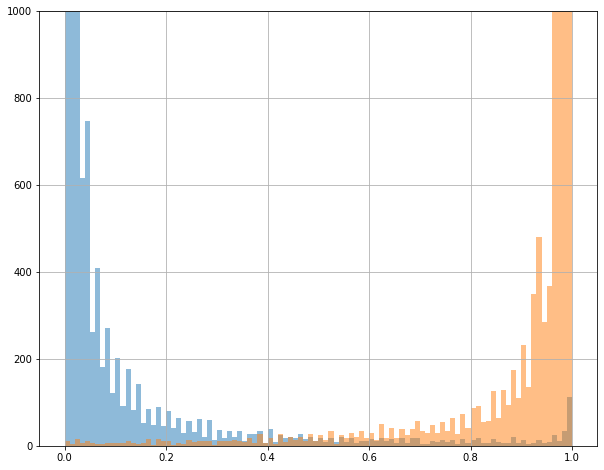

In [6]:
test_df[test_df.y==0].GTR_score.hist(bins=100, figsize=(10,8), alpha=0.5)
test_df[test_df.y==1].GTR_score.hist(bins=100, figsize=(10,8), alpha=0.5)
plt.ylim(0,1000)

In [7]:
thresh = 0.5
PN = np.sum(test_df.y==1)
NN = np.sum(test_df.y==0)
TPN = np.sum((test_df.y==1) & (test_df.pred==1))
TNN = np.sum((test_df.y==0) & (test_df.pred==0))
FPN = np.sum((test_df.y==0) & (test_df.pred==1))
FNN = np.sum((test_df.y==1) & (test_df.pred==0))
cm = np.array([[TNN, FNN],[FPN, TPN]])
print(cm)
print("TNR: {}".format(TNN/NN))
print("TPR: {}".format(TPN/PN))


[[79323   542]
 [  683 79452]]
TNR: 0.9914631402644801
TPR: 0.9932244918368878


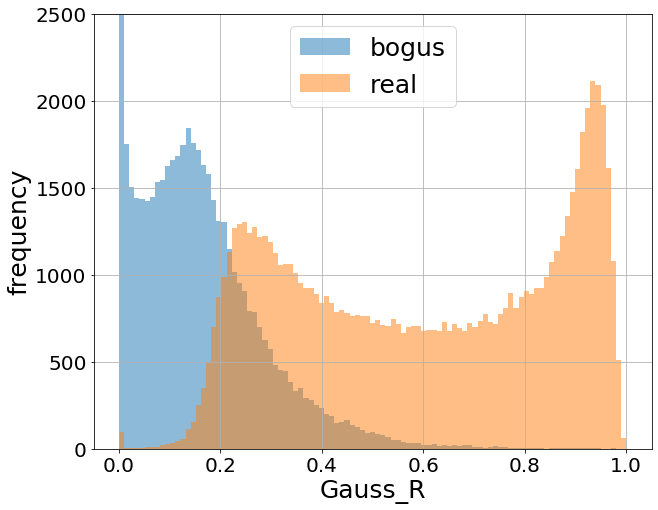

In [15]:
bins = np.linspace(0,1,100)
test_df[test_df.y==0].gauss_R.hist(bins=bins, figsize=(10,8), alpha=0.5, label='bogus')
test_df[test_df.y==1].gauss_R.hist(bins=bins, figsize=(10,8), alpha=0.5, label='real')
plt.xlabel("Gauss_R", fontsize=25)
plt.ylabel("frequency", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=25)
plt.ylim(0,2500)
plt.savefig("gauss_r(non-uniform_mag).pdf", bbox_inches='tight')